# Text Mining Final Project 2019 - 2020

## Identifying Authors by Their Writings 

## Authors: 
- Lara Neves (m20190867) 
- Susana Paço (m20190821)
- Inês Diogo (m20190301)


**Objective:** To identify the authors of portuguese texts by training a model with labeled texts from the same authors. 



**First Visual Analysis**
* Metadata was detected on the top of most txt's which can turn the bias up in the models. It was agreed that a good idea was to remove this crucial metadata from the corpora and test if it made a significant difference in the final result:
    + The name of the authors was detected in most of the metadata;
    + References to the authors works was also detected.
* Texts from different eras of portuguese 


In [ ]:
#installs - please uncomment those packages that you don't have within your system in order to install them

import sys
#!{sys.executable} -m pip install -U unidecode
#!{sys.executable} -m  spacy download pt_core_news_sm

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from collections import defaultdict
from pathlib import Path

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


In [2]:
import sys 
#!{sys.executable} -m pip install git+https://github.com/textpipe/textpipe.git


* [1. Data Pre-Processing](#DPP)
    
    * [1.1. Renaming txt Files](#rename)

    * [1.2. Extracting Data](#extract)
    
    * [1.3. Clearing MetaData](#ClearMD)
    
* [2. Creating a Baseline](#Baseline)

<a class="anchor" id="DPP">

## 1. Data Preprocessing



<a class="anchor" id="rename">

### 1.1. Renaming .txt Files


In [3]:
#Changing the names of the .txt files so there's no duplicates and we create a standardized form to 
#identify each .txt

def change_file_name(author):
    i = 0
    my_dir_path = "Data/Corpora/train/" + author
    
    for filename in os.listdir(my_dir_path): 
        
        #Define the new and old names with directory path
        new_name =str(author) + str(i) + ".txt"
        old_name = my_dir_path + '/' + filename 
        new_name = my_dir_path + '/' + new_name 
        
        #So it doesn't give out an error when it runs for the second time
        # rename all the files 
        if new_name != old_name: #IT STILL GIVES OUT ERROR
            os.rename(old_name, new_name) 
        i += 1

In [4]:
authors = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos','JoseSaramago','LuisaMarquesSilva']
authors_sigla = ['AN','CCB','EQ','JRS','JS','LMS']

#### ONLY RUN ONCE IF THE FILE NAMES ARE THE ORIGINAL otherwise, running a second time, will give an error

In [5]:
#for a in range(len(authors)):
#    change_file_name(authors[a])

<a class="anchor" id="extract">

### 1.2. Extracting Data

In [6]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txt(author):
    my_dir_path = "Data/Corpora/train/" + author

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["author"] = author
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [7]:
#Join together the dataframes from all the authors
def join_df(authors):

    df = pd.DataFrame()
    for a in range(len(authors)):
        df = df.append(create_df_from_txt(authors[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 

In [8]:
### Running all the functions

#Creating the training data frame
traindf = join_df(authors)

#Replacing the name of the authors with labels of their initials
for i in range(0,len(authors)):
    traindf.author = traindf.author.replace(authors[i],authors_sigla[i])
traindf

,id,text,author
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN
1,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN
2,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN
3,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN
4,AlmadaNegreiros5.txt,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,AN
...,...,...,...
58,LuisaMarquesSilva3.txt,CONTROL Z\nChegou a hora de vos contar. Chegou...,LMS
59,LuisaMarquesSilva2.txt,O terrível caso do botão assassino\nLuísa Marq...,LMS
60,LuisaMarquesSilva0.txt,A BELA HISTÓRIA DE DINIS E BEATRIZ OU REQUIEM ...,LMS
61,LuisaMarquesSilva1.txt,\n\n\nAcabou-se!\nLuísa Marques da Silva\n\nTí...,LMS


## Test Data

In [ ]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txttest(numberofwords):
    my_dir_path = "Data/Corpora/test/"+ str(numberofwords)

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["numberofwords"] = numberofwords
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [ ]:
def join_dftest(numberofwords):

    df = pd.DataFrame()
    for a in range(len(numberofwords)):
        df = df.append(create_df_from_txttest(numberofwords[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 


In [ ]:
numberofwords = [1000, 500]


In [ ]:
### Running all the functions

#Creating the training data frame
testdf = join_dftest(numberofwords)



In [ ]:
#checktable
testdf.head(3)

<a class="anchor" id="clearMD">

### 1.2. Clearing MetaData
</a>

The majority of the .txt files have metadata at the beginning. This is unnecessary and may introduce noise in our model, as such it may be a good idea to remove it. 

In [1]:
#import sys
#!{sys.executable} -m pip install -U spacy
#!{sys.executable} -m  spacy download pt_core_news_sm

In [2]:
import pt_core_news_sm
import spacy
#nlp = pt_core_news_sm.load()
spacy_nlp = spacy.load('pt_core_news_sm')

In [11]:
#author names to remove them from metadata
authors = ["José de Almada Negreiros", "José de ALMADA-NEGREIROS", "JOSÉ DE ALMADA-NEGREIROS", "Almada Negreiros", "Camilo Castelo Branco", "CAMILLO CASTELLO BRANCO", "Eça de Queirós", "Eca de Queiros", "José Rodrigues dos Santos","Jose Rodrigues dos Santos", "JOSÉ RODRIGUES DOS SANTOS", "José Saramago", "Jose Saramago", "JoSÉ SaRamago", "Luísa Marques Silva", "Luisa Marques Silva", "Luísa Marques da Silva"]  

    

In [12]:
#book names to stop words
import pandas as pd
authorsandbooks = pd.read_excel('Data/AuthorsAndBooks.xlsx')
authorsandbooks.head(3)

,Eça de Queirós,Camilo Castelo Branco,Almada Negreiros,Saramago,José Rodrigues dos Santos,Luísa Marques Silva
0,O Mistério da Estrada de Sintra,Anátema,O Moinho,Terra do Pecado,"Comunicação, Difusão Cultural, 1992; Prefácio",Acabou-se!
1,O Crime do Padre Amaro,Os Mistérios de Lisboa,Os Outros,Manual de Pintura e Caligrafia,Crónicas de Guerra I - Da Crimeia a Dachau,Sete Histórias por Acontecer
2,A Tragédia da Rua das Flores,A Filha do Arcediago,"23, 2º Andar",Levantado do Chão,Crónicas de Guerra II - De Saigão a Bagdade,e-Medo


In [13]:
#authors work to arrays

# Eça Queirós books
Eca = authorsandbooks['Eça de Queirós']
Eca = Eca.dropna()
Eca = pd.array(Eca)


#Camilo Castelo Branco books
camilo = authorsandbooks['Camilo Castelo Branco']
camilo = camilo.dropna()
camilo = pd.array(camilo)


# Almada Negreiros books
Almada = authorsandbooks['Almada Negreiros']
Almada = Almada.dropna()
Almada = pd.array(Almada)


# Saramago books
Saramago = authorsandbooks['Saramago']
Saramago = Saramago.dropna()
Saramago = pd.array(Saramago)


# José Rodrigues dos Santos books
JRodriguesSantos = authorsandbooks['José Rodrigues dos Santos']
JRodriguesSantos = JRodriguesSantos.dropna()
JRodriguesSantos = pd.array(JRodriguesSantos)


# Luísa Marques Silva books
luisaMarquesSilva = authorsandbooks['Luísa Marques Silva']
luisaMarquesSilva = luisaMarquesSilva.dropna()
luisaMarquesSilva = pd.array(luisaMarquesSilva)

In [14]:
import re
from tqdm import tqdm_notebook as tqdm #progressbar

def removemetadata(doc):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc['text'].iloc[i,]
        for w in authors:
            text = re.sub(w,"",text)
        for x in Eca:
            text = re.sub(x,"",text)
        for t in camilo:
            text = re.sub(t,"",text)
        for s in Almada:
            text = re.sub(s,"",text)
        for y in Saramago:
            text = re.sub(y,"",text)
        for n in JRodriguesSantos:
            text = re.sub(n,"",text)
        for m in luisaMarquesSilva:
            text = re.sub(m,"",text)
        processed_corpus.append(text)
    return processed_corpus

In [15]:
#create a column to test the results of removing crucial metadata text
traindf['removeMetadata'] = removemetadata(traindf)

In [16]:
traindf.head()

,id,text,author,removeMetadata
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN,\nTitle: \n \n\nAuthor: \n\nContributor:...
1,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN,\n\nTitle: \n\nAuthor: \n\nRelease Date: Septe...
2,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,Title: \n\nAuthor: \n\nRelease Date: September...
3,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN,Title: \n\nAuthor: \n\nRelease Date: September...
4,AlmadaNegreiros5.txt,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,AN,\n\n**\n\n\n*K4\n\no quadrado\n\nAZUL*\n\nACAB...


     |████████████████████████████████| 238 kB 2.0 MB/s eta 0:00:01


<a class="anchor" id="clearTexts">

### 1.4. Cleaning Texts
</a>


In [19]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm_notebook as tqdm #progressbar
from unidecode import unidecode
from nltk.stem import RSLPStemmer
#nltk.download('rslp')

#### Auxiliary functions for preprocessing:

In [20]:
def lowercasing(text):       
    text = text.lower()     
    return text

def to_string(text):
    text = text.split()
    return text

def lemmatization(word):
    lem = WordNetLemmatizer()
    word =lem.lemmatize(word)
    return word

def punctuation(word):
    word = re.sub('[\“\”\ "\-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word)
    return word

def stopwords_nltk(word):
    stop_words = set(stopwords.words("portuguese")) 
    return word in stop_words

def stopwords_spacy(word):
    return spacy_nlp.vocab[word].is_stop

def accents(word):
    word = unidecode(word)
    return word

### Preprocessing 1
##### with punctuation and no lemmatization

In [21]:
def preprocessing_with_punc(doc, column):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]    
    
        text = lowercasing(text)
        
        text = to_string(text)

        textfinal = []
        for word in text:
            if stopwords_nltk(punctuation(word)) or stopwords_spacy(punctuation(word)):
                word = re.sub('[^\“\”\ "\-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word)
            else:
                word
            textfinal.append(word)

        text = " ".join(textfinal)
    
        processed_corpus.append(text)
         
    return processed_corpus

In [22]:

#this process takes some time, please have patience
traindf['clean_with_punc'] = preprocessing_with_punc(traindf, 'removeMetadata')

### Preprocessing 2 
##### no punctuation and no lemmatization 

In [25]:
def preprocessing_no_punc(doc, column):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]    
    
        text = lowercasing(text)
        
        text = to_string(text)
        
        text = [punctuation(word) for word in text]

        text = [word for word in text if (not stopwords_nltk(word)) and (not stopwords_spacy(word))]
        
        text = [accents(word) for word in text] 

        text = " ".join(text)
    
        processed_corpus.append(text)
         
    return processed_corpus

In [26]:
traindf['clean_no_punc'] = preprocessing_no_punc(traindf, 'removeMetadata')

### Preprocessing 3 
##### no punctuation and with lemmatization

In [27]:
def preprocessing_clean(doc, column):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]    
    
        text = lowercasing(text)
        
        text = to_string(text)
        
        text = [punctuation(word) for word in text]

        text = [word for word in text if (not stopwords_nltk(word)) and (not stopwords_spacy(word))]
        
        text = [lemmatization(word) for word in text]
        
        text = [accents(word) for word in text] 

        text = " ".join(text)
    
        processed_corpus.append(text)
         
    return processed_corpus

In [28]:
traindf['clean'] = preprocessing_clean(traindf, 'removeMetadata')

## Choosing Evaluation Metrics

Can we use Accuracy as an evaluation metric? Depends if the dataset is unbalanced. Let's check:

In [29]:
traindf.iloc[:,2].value_counts()

CCB    20
JS     12
LMS     9
AN      9
JRS     8
EQ      5
Name: author, dtype: int64

It is unbalanced in favour of Camilo Castelo Branco which is why we get a higher accuracy when we use the DummyClassifier with most frequent strategy (0.31) compared to other strategies (stratified 0.22) even though it's just classifying all texts as belonging to CCB. As such accuracy may not be the best metric in this case.

Instead we will use the F1 Score as it integrates Precision and Recall simultaneously.

## Word Cloud

To see a word cloud - or the most frequent words - written by a given author just type in the function one of the following siglas: 


In [30]:
authors_sigla

['AN', 'CCB', 'EQ', 'JRS', 'JS', 'LMS']

Corresponding to the following authors:

In [31]:
authors

['José de Almada Negreiros',
 'José de ALMADA-NEGREIROS',
 'JOSÉ DE ALMADA-NEGREIROS',
 'Almada Negreiros',
 'Camilo Castelo Branco',
 'CAMILLO CASTELLO BRANCO',
 'Eça de Queirós',
 'Eca de Queiros',
 'José Rodrigues dos Santos',
 'Jose Rodrigues dos Santos',
 'JOSÉ RODRIGUES DOS SANTOS',
 'José Saramago',
 'Jose Saramago',
 'JoSÉ SaRamago',
 'Luísa Marques Silva',
 'Luisa Marques Silva',
 'Luísa Marques da Silva']

In [32]:
def word_cloud(author,text_column):
    word_cloud = " ".join(traindf[traindf['author']==author][text_column])


    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_cloud)
    # Display the generated image:
    plt.figure(figsize=(17,7))
    plt.title('Word Cloud from ' + author)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

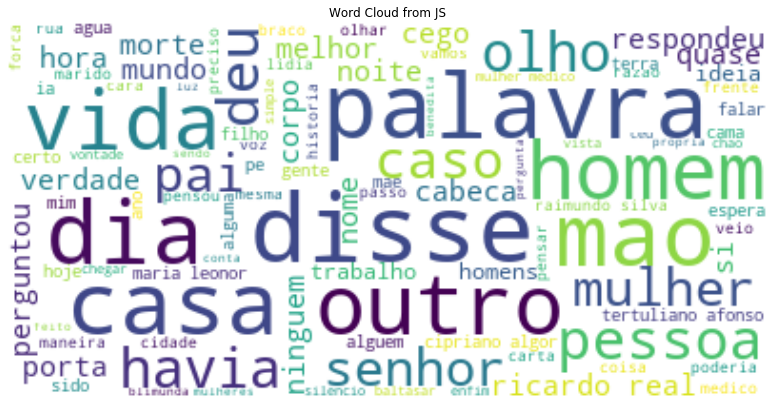

In [33]:
word_cloud('JS','clean')

WILL NEED TO REMOVE STOP WORDS FIRST BEFORE IT MAKES ANY SENSE 

## Testing the Importance of Punctuation

We know that José Saramago has an interesting use of punctuation and it can be a factor in identifying texts from him. Does this mean that we shouldn't consider punctuations as stop-words? Let's test it.

To do so we will use a dummy classifier on two texts from Saramago and two from JRS. Will we see a difference in the performance of the classifier with or without punctuation?

In [34]:
punc_traindf = traindf[traindf.author=='JS'][1:3].append(traindf[traindf.author=='JRS'][1:3])

We will run the dummy classifier n_iter times and determine the difference between the two. If the classifier is better with punctuation we should see a _positive difference_ meaning that the classifier that runs on the text with punctuation should have a better accuracy score than the one without. 

In [35]:
n_iter = 50000
score_punc_test = []
for i in range(0,n_iter):
    score_punc_test.append(dummy_classifier_score(punc_traindf,'clean_with_punc','stratified')-dummy_classifier_score(punc_traindf,'clean','stratified'))
    i += 1
score_punc_test = pd.DataFrame(score_punc_test)

NameError: name 'dummy_classifier_score' is not defined

In [ ]:
score_punc_test.describe()

There's a very very small change between each classifiers. Which may indicate that there are no difference in the performance of the classifier of JS with or without punctuation. 

To confirm this, let's do a one sided hypothesis test, where the null hypothesis is that the mean of the difference between the scores is zero, meaning there is no difference between doing a classifier with or without punctuation for José Saramago.

In [ ]:
from scipy.stats import ttest_1samp

diff_mean = np.mean(score_punc_test)
print('mean', diff_mean)
tset, pval = ttest_1samp(score_punc_test, 0)
print('p-values', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Reject the null hypothesis: there are evidence that the classifier performs differently if there's punctuation")
else:
  print("Do not reject the null hypothesis: there are no evidence that the classifier is better if we mantain the punctuation")

## Dividing the text into chunks of 500 words

In [ ]:
def split_doc(doc,column,n):
    newdf = pd.DataFrame()
    newdf = newdf.reindex(columns = ['id','chunks','author']) 
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]

        text = text.split()

        chunks = [' '.join(text[j:j+n]) for j in range(0,len(text),n)]

        for c in chunks:
            data = []
            values = [doc['id'].iloc[i,], c, doc['author'].iloc[i,]]
            a_dictionary = dict(zip(newdf.columns.tolist(), values))
            data.append(a_dictionary)
            newdf = newdf.append(data)
            
    newdf.index =[j for j in range(len(newdf))]  
              
    return newdf

In [ ]:
traindf_chunks = split_doc(traindf, 'clean' ,500)

In [ ]:
traindf_chunks.head(10)

## Cross-validation 
We already have a test set defined however there is value in having an evaluation/development set to determine the model performance as it's being trained and to adjust the parameters.

Given the relatively small amount of data we chose to use cross-validation rather than splitting the set into training and evaluation sets.

We will do so by applying the k-fold crossvalidation method, the choice of number of folds k will be decided according to:

"... there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance." - Page 184, An Introduction to Statistical Learning, 2013.

In [ ]:
from sklearn.model_selection import KFold
#Creating a k-fold instance where the number of splits is 10
kf = KFold(n_splits=10)

In [ ]:
#Using accuracy may have to change
def evaluate_model(X,y, model):
    return model.score(X,y)

<a class="anchor" id="Baseline">

## 2. Creating a Baseline
    
</a>

Our goal now is to create a naíve baseline to compare our model with. It won't involve any pre-processing of data or removal of extra meta data.

#### 1st Try
Using DummyClassifier as a baseline? 

In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [86]:
def dummy_classifier_score(df,text_column,strategy):

    X = df.loc[:,text_column]
    y = df.loc[:,'author']
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    dummy_clf.fit(X, y)
    dummy_clf.predict(X)
    return dummy_clf.score(X, y)

In [87]:
dummy_classifier_score(traindf,'text','most_frequent')

0.31746031746031744

Using a Dummy Classifier inside a crossvalidation k-fold 

In [88]:
#Placeholder dummy classifier
def dummy_classifier_model(X,y,strategy):
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    model = dummy_clf.fit(X, y)
    return model

In [89]:
#For the dummy classifier
def avg_score_DC(method,X,y,strategy, metric):
    score_train = []
    score_eval = []
    for train_index, eval_index in method.split(X):
        X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[eval_index]
        ####Define model:
        model = dummy_classifier_model(X_train,y_train,strategy)
        ###############
        if metric == 'accuracy':
            value_train = evaluate_model(X_train, y_train, model)
            value_eval = evaluate_model(X_eval,y_eval, model)
            
        elif metric == 'f1':
            yhat_train = model.predict(X_train)
            yhat_eval = model.predict(X_eval)
            value_train = f1_score(y_train, yhat_train, average='weighted')
            value_eval = f1_score(y_eval, yhat_eval, average='weighted')
        score_train.append(value_train)
        score_eval.append(value_eval)
        
    print('Evaluation measure used:', metric)
    print('Train:', np.mean(score_train))
    print('Evaluation:', np.mean(score_eval))

In [90]:
avg_score_DC(kf,traindf['clean'],traindf['author'],'stratified','accuracy')

Train: 0.2098997493734336
Evaluation: 0.20238095238095238


In [ ]:
avg_score_DC(kf,traindf['clean'],traindf['author'],'stratified','f1')

Very bad result with dummy classifier as expected. Creating a bag-of-words is probably a better choice: 
#### 2nd Try

In [91]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def bag_of_words_model(X,y):
    count_vect = CountVectorizer(
        max_df=0.8,
        max_features=10000, 
        ngram_range=(1,3)
    )
    
    X_count = count_vect.fit_transform(X)
    #using frequencies instead of occurrences in order to normalize the counts for 
    #documents that are larger compared to smaller ones -term frequency
    #As well as downscaling weights for words that occur in many documntenst in the corpus
    #and are therefore less informative 

    X_train_tfidf =  TfidfTransformer().fit_transform(X_count)
    #Now that we have the features we can train the classifier. 
    #Let's use a naive bayes classsifier in the multinomial variant as it's the most well suited for word counts
    model = MultinomialNB().fit(X_train_tfidf, y)
    return model, X_train_tfidf

In [92]:
def avg_score_baseline(method,X,y, metric):
    #Using Bag-of-Words
    score_train = []
    score_eval = []
    for train_index, eval_index in method.split(X):
        X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[eval_index]
        
        ##Define model:
        model = bag_of_words_model(X_train,y_train)[0]
        
        ##Evaluation of baseline model
        #The evaluate_model functions needs to use the respective X_train with the tfid transformer.
        if metric == 'accuracy':
            value_train = evaluate_model(bag_of_words_model(X_train,y_train)[1], y_train, model)
            value_eval = evaluate_model(bag_of_words_model(X_eval,y_eval)[1],y_eval, model)
            
        elif metric == 'f1':
            yhat_train = model.predict(bag_of_words_model(X_train,y_train)[1])
            yhat_eval = model.predict(bag_of_words_model(X_eval,y_eval)[1])
            value_train = f1_score(y_train, yhat_train, average='weighted')
            value_eval = f1_score(y_eval, yhat_eval, average='weighted')

        score_train.append(value_train)
        score_eval.append(value_eval)
        
        ##Average of Evaluation measure
    #print('Evaluation measure used:', metric)
    #print('Train:', np.mean(score_train))
    #print('Evaluation:', np.mean(score_eval))
    return [np.mean(score_train),np.mean(score_eval)]

#### Dataframe to save the scores

In [ ]:
df_scores= pd.DataFrame()
df_scores = newdf.reindex(columns = ['testing','metric','score train', 'score evaluation']) 

In [ ]:
def doc_score_baseline(df, doc,column, metric):
    data = []
    score_train = avg_score_baseline(kf,doc[column],doc['author'], metric)[0]
    score_eval = avg_score_baseline(kf,doc[column],doc['author'], metric)[1]
    values = [column, metric, score_train, score_eval]
    a_dictionary = dict(zip(df.columns.tolist(), values))
    data.append(a_dictionary)
    df = df.append(data)
            
    df.index =[j for j in range(len(newdf))]  
    print('Evaluation measure used:', metric)
    print('Train:', score_train)
    print('Evaluation:', score_eval)              
    return df

## Testing the models with different levels of Preprocessing

In [95]:
avg_score_baseline(kf,traindf['text'],traindf['author'],'accuracy')

Train: 0.806296992481203
Evaluation: 0.2619047619047619


In [97]:
avg_score_baseline(kf,traindf['removeMetadata'],traindf['author'],'accuracy')

Train: 0.8045426065162907
Evaluation: 0.29047619047619044


In [114]:
avg_score_baseline(kf,traindf['clean_with_punc'],traindf['author'],'accuracy')

Train: 0.7940162907268171
Evaluation: 0.3047619047619048


In [115]:
avg_score_baseline(kf,traindf['clean_no_punc'],traindf['author'],'accuracy')

Train: 0.7993107769423559
Evaluation: 0.3047619047619048


In [116]:
avg_score_baseline(kf,traindf['clean'],traindf['author'],'accuracy')

Train: 0.7975250626566416
Evaluation: 0.3047619047619048


In [117]:
traindf

,id,text,author,removeMetadata,clean_with_punc,clean_no_punc,clean
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,Title: \n\nAuthor: \n\nRelease Date: September...,"title: author: release date: september 16, 200...",title author release date september 16 2007 eb...,title author release date september 16 2007 eb...
1,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN,Title: \n\nAuthor: \n\nRelease Date: September...,"title: author: release date: september 23, 200...",title author release date september 23 2007 eb...,title author release date september 23 2007 eb...
2,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN,\n\nTitle: \n\nAuthor: \n\nRelease Date: Septe...,"title: author: release date: september 29, 200...",title author release date september 29 2007 eb...,title author release date september 29 2007 eb...
3,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN,\nTitle: \n \n\nAuthor: \n\nContributor:...,title: author: contributor: amadeu sousa card...,title author contributor amadeu sousa cardoso ...,title author contributor amadeu sousa cardoso ...
4,AlmadaNegreiros4.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,exposição +amadeo souza cardoso+ liga naval ...,exposicao amadeo souza cardoso liga naval lisb...,exposicao amadeo souza cardoso liga naval lisb...
...,...,...,...,...,...,...,...
58,LuisaMarquesSilva4.txt,Título\ne-medo\n\nAutora (inspiradíssima)\nLuí...,LMS,Título\n\n\nAutora (inspiradíssima)\n\n\nTodos...,título autora (inspiradíssima) direitos rese...,titulo autora inspiradissima direitos reservad...,titulo autora inspiradissima direitos reservad...
59,LuisaMarquesSilva5.txt,"LISBOA 2050\nLisboa, ano de 2050. Um Agosto tã...",LMS,"\nLisboa, ano de 2050. Um Agosto tão gelado co...","lisboa, ano 2050. agosto gelado anos . ...",lisboa ano 2050 agosto gelado anos dia triste ...,lisboa ano 2050 agosto gelado ano dia triste m...
60,LuisaMarquesSilva6.txt,Título\nUm passeio pelo inferno\n\nAutora\nLuí...,LMS,Título\n\n\nAutora\n\n\nTodos os direitos rese...,título autora direitos reservados ©2015 capa...,titulo autora direitos reservados (c)2015 capa...,titulo autora direitos reservados (c)2015 capa...
61,LuisaMarquesSilva7.txt,Título\nRapsódia sem dó (maior)\n\nAutora\nLuí...,LMS,Título\nRapsódia sem dó (maior)\n\nAutora\n\n\...,título rapsódia dó () autora direitos reser...,titulo rapsodia do autora direitos reservados ...,titulo rapsodia do autora direitos reservados ...


In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'text', 'accuracy')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'text', 'f1')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'removeMetadata', 'accuracy')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'removeMetadata', 'f1')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'clean_with_punc', 'accuracy')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'clean_with_punc', 'f1')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'clean_no_punc', 'accuracy')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'clean_no_punc', 'f1')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'clean', 'accuracy')

In [ ]:
df_scores = doc_score_baseline(df_scores, traindf, 'clean', 'f1')

In [ ]:
df_scores

## Continuous Bag of Words Model

In [ ]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [ ]:
top_df = get_top_n_grams(traindf['clean'], top_k=20, n=1)
top_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()
plot_frequencies(top_df)